In [6]:
from numpy import linalg as la

def fun(x):
    x1=x[0]
    x2=x[1]
    f=10*(x2-x1**2)**2+(1-x1)**2
    return f

[[-1.5        -1.48643216 -1.47286432 ...  1.17286432  1.18643216
   1.2       ]
 [-1.5        -1.48643216 -1.47286432 ...  1.17286432  1.18643216
   1.2       ]
 [-1.5        -1.48643216 -1.47286432 ...  1.17286432  1.18643216
   1.2       ]
 ...
 [-1.5        -1.48643216 -1.47286432 ...  1.17286432  1.18643216
   1.2       ]
 [-1.5        -1.48643216 -1.47286432 ...  1.17286432  1.18643216
   1.2       ]
 [-1.5        -1.48643216 -1.47286432 ...  1.17286432  1.18643216
   1.2       ]]


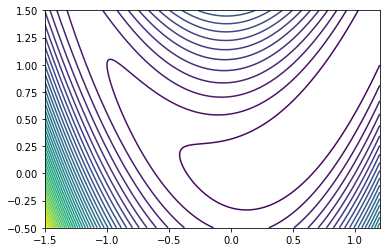

In [8]:
#1. Function Plot. 
import matplotlib.pyplot as plt
from math import pi,sqrt
import numpy as np
x1=np.linspace(-1.5,1.2,200)
x2=np.linspace(-0.5,1.5,200)
x1,x2=np.meshgrid(x1,x2)
x=[x1,x2]

f=fun(x)
plt.contour(x1,x2,f,50)

In [7]:
#2. Gradient Computation. 
def rosen_grad(x):
    
    x1=x[0]
    x2=x[1]
    grad=[0,0]
    grad[1]=20*(x2-x1**2)
    grad[0]=-40*x[0]*(x[1] - x[0]**2) + 2*x[0] - 2
    return grad

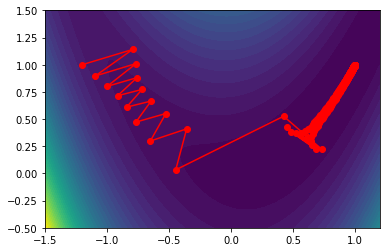

In [9]:
#3. Backtracking Line Search. 
def backtrack(fun,grad, p,xk,alpha,beta):
    
    t=1
    while(fun(xk + t*p)> fun(xk) + alpha* t * (grad @ p)):
        t *=beta
    return t

def steepest_descent_bt(fun, grad, x0,Tol,alpha,beta):
    #k=0
    x=x0
    Xs=np.array([x0])
    while(la.norm(grad(x))> Tol):
        p= -1* np.array(grad(x))/la.norm(grad(x))
        t = backtrack(fun,grad(x),p,x,alpha,beta)
        x+=t*p 
        Xs=np.vstack((Xs,x))
    return Xs
x0= np.array([-1.2,1.0])
Xs=steepest_descent_bt(fun, rosen_grad, x0,Tol=1e-05,alpha=0.05,beta=0.9)
n =len(Xs)
plt.plot(Xs[:,0],Xs[:,1],'r-o')
ax=plt.contourf(x1,x2,f,50,linestyles='solid')
plt.show()

Text(0, 0.5, '$|f^k - f^*|$')

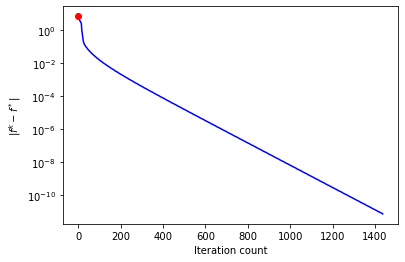

In [13]:
#4. Convergence Behavior. 
fs=np.zeros(n)
for i in range(n):
    fs[i]=fun(Xs[i])

plt.figure('convergence')
plt.semilogy(np.arange(0, n), np.absolute(fs),'b')
plt.semilogy(0,fs[0],'ro')
plt.xlabel('Iteration count')
plt.ylabel(r'$|f^k - f^*|$')

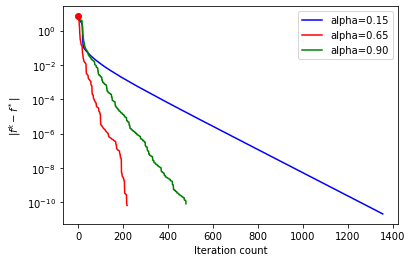

In [69]:
x0= np.array([-1.2,1.0])
Xs1=steepest_descent_bt(fun, rosen_grad, x0,Tol=1e-05,alpha=0.15,beta=0.9)
n1 =len(Xs1)
fs1=np.zeros(n1)
for i in range(n1):
    fs1[i]=fun(Xs1[i])
x0= np.array([-1.2,1.0])    
Xs2=steepest_descent_bt(fun, rosen_grad, x0,Tol=1e-05,alpha=0.65,beta=0.9)
n2 =len(Xs2)
fs2=np.zeros(n2)
for i in range(n2):
    fs2[i]=fun(Xs2[i])
x0= np.array([-1.2,1.0])    
Xs3=steepest_descent_bt(fun, rosen_grad, x0,Tol=1e-05,alpha=0.9,beta=0.9)
n3 =len(Xs3)
fs3=np.zeros(n3)
for i in range(n3):
    fs3[i]=fun(Xs3[i])

plt.figure('convergence')
plt.semilogy(np.arange(0, n1), np.absolute(fs1),'b',label='alpha=0.15')
plt.semilogy(np.arange(0, n2), np.absolute(fs2),'r',label='alpha=0.65')
plt.semilogy(np.arange(0, n3), np.absolute(fs3),'g',label='alpha=0.90')
             
plt.semilogy(0,fs1[0],'ro')
plt.xlabel('Iteration count')
plt.ylabel(r'$|f^k - f^*|$')
plt.legend()
plt.show()